## Carregamento dos dados

In [2]:
from braindecode.datasets import MOABBDataset

dataset = MOABBDataset(dataset_name="BNCI2014001", subject_ids=[9])

48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]


In [3]:
from braindecode.preprocessing import preprocess, Preprocessor
import numpy as np
from numpy import multiply

low_cut_hz = 4.
high_cut_hz = 38.
newfreq = 128
factor = 1e6

preprocessors = [
    Preprocessor('pick_types', eeg=True, meg=False, stim=False),
    Preprocessor(lambda data: multiply(data, factor)),
    Preprocessor('filter', l_freq=low_cut_hz, h_freq=high_cut_hz),
    Preprocessor("set_eeg_reference", ref_channels="average", ch_type="eeg")
]

preprocess(dataset, preprocessors, n_jobs=-1);

/home/matias/Mestrado/venv_BCI/venv_BCI/lib/python3.7/site-packages/braindecode/preprocessing/preprocess.py:55: UserWarning: Preprocessing choices with lambda functions cannot be saved.
  warn('Preprocessing choices with lambda functions cannot be saved.')


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 

In [4]:
from braindecode.preprocessing import create_windows_from_events

sfreq = dataset.datasets[0].raw.info['sfreq']

trial_start_offset_seconds = -0.5
trial_start_offset_samples = int(trial_start_offset_seconds * sfreq)

windows_dataset = create_windows_from_events(
    dataset,
    trial_start_offset_samples=trial_start_offset_samples,
    trial_stop_offset_samples=0,
    preload=True,
)

Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']


In [5]:
import torch
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset

X_ = []
y_ = []

X_0 = []
X_1 = []
X_2 = []
X_3 = []

for X, y, (i_window_in_trial, i_start_sample, i_stop_sample) in windows_dataset:
    if y == 0:
        X_0.append(X)
    elif y == 1:
        X_1.append(X)
    elif y == 2:
        X_2.append(X)
    elif y == 3:
        X_3.append(X)
    X_.append(X)
    y_.append(y)

X_ = torch.as_tensor(X_).float()
y_ = torch.as_tensor(y_)

real_set = TensorDataset(X_, y_)

X_0 = torch.as_tensor(X_0).float()
X_1 = torch.as_tensor(X_1).float()
X_2 = torch.as_tensor(X_2).float()
X_3 = torch.as_tensor(X_3).float()

X_0 = torch.from_numpy(np.expand_dims(X_0, axis=1))
X_1 = torch.from_numpy(np.expand_dims(X_1, axis=1))
X_2 = torch.from_numpy(np.expand_dims(X_2, axis=1))
X_3 = torch.from_numpy(np.expand_dims(X_3, axis=1))

gen_set_0 = TensorDataset(X_0, torch.as_tensor(np.full(144, 0)))
gen_set_1 = TensorDataset(X_1, torch.as_tensor(np.full(144, 1)))
gen_set_2 = TensorDataset(X_2, torch.as_tensor(np.full(144, 2)))
gen_set_3 = TensorDataset(X_3, torch.as_tensor(np.full(144, 3)))

print(X_0.shape)
print(X_1.shape)
print(X_2.shape)
print(X_3.shape)
print(X_.shape)
print(y_.shape)

torch.Size([144, 1, 22, 1125])
torch.Size([144, 1, 22, 1125])
torch.Size([144, 1, 22, 1125])
torch.Size([144, 1, 22, 1125])
torch.Size([576, 22, 1125])
torch.Size([576])


/home/matias/Mestrado/venv_BCI/venv_BCI/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:230.)


## Definição do modelo da GAN

In [6]:
from torch import flatten
from torch import nn

In [7]:
class Generator(nn.Module):
    def __init__(self, inputDim=100, outputChannels=1):
        super(Generator, self).__init__()
        
        self.ct1 = nn.ConvTranspose2d(in_channels=inputDim, out_channels=128, kernel_size=(1, 140), stride=2, padding=0, bias=False)
        self.relu1 = nn.ReLU()
        self.batchNorm1 = nn.BatchNorm2d(128)
        
        self.ct2 = nn.ConvTranspose2d(in_channels=128, out_channels=64, kernel_size=(4, 4), stride=2, padding=0, bias=False)
        self.relu2 = nn.ReLU()
        self.batchNorm2 = nn.BatchNorm2d(64)
        
        self.ct3 = nn.ConvTranspose2d(in_channels=64, out_channels=32, kernel_size=(4, 1), stride=2, padding=0, bias=False)
        self.relu3 = nn.ReLU()
        self.batchNorm3 = nn.BatchNorm2d(32)
        
        self.ct4 = nn.ConvTranspose2d(in_channels=32, out_channels=outputChannels, kernel_size=(4, 1), stride=2, padding=0, bias=False)
        self.tanh = nn.Tanh()
        
    def forward(self, x):
        x = self.ct1(x)
        x = self.relu1(x)
        x = self.batchNorm1(x)
        
        x = self.ct2(x)
        x = self.relu2(x)
        x = self.batchNorm2(x)
        
        x = self.ct3(x)
        x = self.relu3(x)
        x = self.batchNorm3(x)
        
        x = self.ct4(x)
        output = self.tanh(x)
        
        return output

In [8]:
class Discriminator(nn.Module):
	def __init__(self, depth, alpha=0.2):
		super(Discriminator, self).__init__()
        
		self.conv1 = nn.Conv2d(in_channels=depth, out_channels=32, kernel_size=4, stride=2, padding=1)
		self.leakyRelu1 = nn.LeakyReLU(alpha, inplace=True)
        
		self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=4, stride=2, padding=1)
		self.leakyRelu2 = nn.LeakyReLU(alpha, inplace=True)
        
		self.fc1 = nn.Linear(in_features=89920, out_features=512)
		self.leakyRelu3 = nn.LeakyReLU(alpha, inplace=True)
        
		self.fc2 = nn.Linear(in_features=512, out_features=1)
		self.sigmoid = nn.Sigmoid()

	def forward(self, x):
		x = self.conv1(x)
		x = self.leakyRelu1(x)
        
		x = self.conv2(x)
		x = self.leakyRelu2(x)
        
		x = flatten(x, 1)
		x = self.fc1(x)
		x = self.leakyRelu3(x)
        
		x = self.fc2(x)
		output = self.sigmoid(x)
        
		return output

In [9]:
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
NUM_EPOCHS = 20
BATCH_SIZE = 128

In [10]:
dataloader_0 = DataLoader(dataset=gen_set_0, batch_size=128)
dataloader_1 = DataLoader(dataset=gen_set_1, batch_size=128)
dataloader_2 = DataLoader(dataset=gen_set_2, batch_size=128)
dataloader_3 = DataLoader(dataset=gen_set_3, batch_size=128)

In [11]:
from torch.optim import Adam
from torch.nn import BCELoss

stepsPerEpoch = len(dataloader_0.dataset) // BATCH_SIZE

print("[INFO] building generator...")
gen = Generator(inputDim=100, outputChannels=1)
gen.to(DEVICE)

print("[INFO] building discriminator...")
disc = Discriminator(depth=1)
disc.to(DEVICE)

genOpt = Adam(gen.parameters(), lr=0.0002, betas=(0.5, 0.999), weight_decay=0.0002 / NUM_EPOCHS)
discOpt = Adam(disc.parameters(), lr=0.0002, betas=(0.5, 0.999), weight_decay=0.0002 / NUM_EPOCHS)

criterion = BCELoss()

print("[INFO] starting training...")
benchmarkNoise = torch.randn(144, 100, 1, 1, device=DEVICE)

realLabel = 1
fakeLabel = 0

[INFO] building generator...
[INFO] building discriminator...
[INFO] starting training...


In [12]:
from torchsummary import summary
summary(gen, (100, 1, 1))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
   ConvTranspose2d-1          [-1, 128, 1, 140]       1,792,000
              ReLU-2          [-1, 128, 1, 140]               0
       BatchNorm2d-3          [-1, 128, 1, 140]             256
   ConvTranspose2d-4           [-1, 64, 4, 282]         131,072
              ReLU-5           [-1, 64, 4, 282]               0
       BatchNorm2d-6           [-1, 64, 4, 282]             128
   ConvTranspose2d-7          [-1, 32, 10, 563]           8,192
              ReLU-8          [-1, 32, 10, 563]               0
       BatchNorm2d-9          [-1, 32, 10, 563]              64
  ConvTranspose2d-10          [-1, 1, 22, 1125]             128
             Tanh-11          [-1, 1, 22, 1125]               0
Total params: 1,931,840
Trainable params: 1,931,840
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forw

In [13]:
summary(disc, (1, 22, 1125))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 32, 11, 562]             544
         LeakyReLU-2          [-1, 32, 11, 562]               0
            Conv2d-3           [-1, 64, 5, 281]          32,832
         LeakyReLU-4           [-1, 64, 5, 281]               0
            Linear-5                  [-1, 512]      46,039,552
         LeakyReLU-6                  [-1, 512]               0
            Linear-7                    [-1, 1]             513
           Sigmoid-8                    [-1, 1]               0
Total params: 46,073,441
Trainable params: 46,073,441
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.09
Forward/backward pass size (MB): 4.40
Params size (MB): 175.76
Estimated Total Size (MB): 180.25
----------------------------------------------------------------


## Geração dos dados sintéticos

In [14]:
for epoch in range(NUM_EPOCHS):
    print("[INFO] starting epoch {} of {}...".format(epoch + 1, NUM_EPOCHS))
    
    epochLossG = 0
    epochLossD = 0
    for x in dataloader_0:
        disc.zero_grad()
        
        images = x[0]
        images = images.to(DEVICE)
        
        bs =  images.size(0)
        labels = torch.full((bs,), realLabel, dtype=torch.float, device=DEVICE)
        
        output = disc(images).view(-1)
        
        errorReal = criterion(output, labels)
        
        errorReal.backward()
        
        noise = torch.randn(bs, 100, 1, 1, device=DEVICE)
        
        fake_0 = gen(noise)
        labels.fill_(fakeLabel)
        
        output = disc(fake_0.detach()).view(-1)
        errorFake = criterion(output, labels)
        
        errorFake.backward()
        
        errorD = errorReal + errorFake
        discOpt.step()
        
        gen.zero_grad()
        
        labels.fill_(realLabel)
        output = disc(fake_0).view(-1)
        
        errorG = criterion(output, labels)
        errorG.backward()
        
        genOpt.step()
        
        epochLossD += errorD
        epochLossG += errorG
        
    print("[INFO] Generator Loss: {:.4f}, Discriminator Loss: {:.4f}".format(epochLossG / stepsPerEpoch, epochLossD / stepsPerEpoch))
    if (epoch + 1) % 2 == 0:
        gen.eval()
        fake_0 = gen(benchmarkNoise)
        gen.train()

[INFO] starting epoch 1 of 20...
[INFO] Generator Loss: 0.3302, Discriminator Loss: 5.0886
[INFO] starting epoch 2 of 20...
[INFO] Generator Loss: 3.2817, Discriminator Loss: 1.9368
[INFO] starting epoch 3 of 20...
[INFO] Generator Loss: 9.3136, Discriminator Loss: 0.1374
[INFO] starting epoch 4 of 20...
[INFO] Generator Loss: 12.0399, Discriminator Loss: 0.0096
[INFO] starting epoch 5 of 20...
[INFO] Generator Loss: 12.6362, Discriminator Loss: 0.0047
[INFO] starting epoch 6 of 20...
[INFO] Generator Loss: 12.4438, Discriminator Loss: 0.0048
[INFO] starting epoch 7 of 20...
[INFO] Generator Loss: 12.1022, Discriminator Loss: 0.0061
[INFO] starting epoch 8 of 20...
[INFO] Generator Loss: 11.7945, Discriminator Loss: 0.0076
[INFO] starting epoch 9 of 20...
[INFO] Generator Loss: 11.5128, Discriminator Loss: 0.0102
[INFO] starting epoch 10 of 20...
[INFO] Generator Loss: 11.2262, Discriminator Loss: 0.0152
[INFO] starting epoch 11 of 20...
[INFO] Generator Loss: 11.1145, Discriminator Lo

In [15]:
print(fake_0.shape)

torch.Size([144, 1, 22, 1125])


In [16]:
size=(22, 1125)
fake_0 = fake_0.detach().cpu().view(-1, *size)
print(fake_0.shape)

torch.Size([144, 22, 1125])


In [17]:
import gc

gen.cpu()
disc.cpu()
del gen, disc
gc.collect()
torch.cuda.empty_cache()

In [18]:
stepsPerEpoch = len(dataloader_0.dataset) // BATCH_SIZE

print("[INFO] building generator...")
gen = Generator(inputDim=100, outputChannels=1)
gen.to(DEVICE)

print("[INFO] building discriminator...")
disc = Discriminator(depth=1)
disc.to(DEVICE)

genOpt = Adam(gen.parameters(), lr=0.0002, betas=(0.5, 0.999), weight_decay=0.0002 / NUM_EPOCHS)
discOpt = Adam(disc.parameters(), lr=0.0002, betas=(0.5, 0.999), weight_decay=0.0002 / NUM_EPOCHS)

criterion = BCELoss()

print("[INFO] starting training...")
benchmarkNoise = torch.randn(144, 100, 1, 1, device=DEVICE)

realLabel = 1
fakeLabel = 0

[INFO] building generator...
[INFO] building discriminator...
[INFO] starting training...


In [19]:
for epoch in range(NUM_EPOCHS):
    print("[INFO] starting epoch {} of {}...".format(epoch + 1, NUM_EPOCHS))
    
    epochLossG = 0
    epochLossD = 0
    for x in dataloader_1:
        disc.zero_grad()
        
        images = x[0]
        images = images.to(DEVICE)
        
        bs =  images.size(0)
        labels = torch.full((bs,), realLabel, dtype=torch.float, device=DEVICE)
        
        output = disc(images).view(-1)
        
        errorReal = criterion(output, labels)
        
        errorReal.backward()
        
        noise = torch.randn(bs, 100, 1, 1, device=DEVICE)
        
        fake_1 = gen(noise)
        labels.fill_(fakeLabel)
        
        output = disc(fake_1.detach()).view(-1)
        errorFake = criterion(output, labels)
        
        errorFake.backward()
        
        errorD = errorReal + errorFake
        discOpt.step()
        
        gen.zero_grad()
        
        labels.fill_(realLabel)
        output = disc(fake_1).view(-1)
        
        errorG = criterion(output, labels)
        errorG.backward()
        
        genOpt.step()
        
        epochLossD += errorD
        epochLossG += errorG
        
    print("[INFO] Generator Loss: {:.4f}, Discriminator Loss: {:.4f}".format(epochLossG / stepsPerEpoch, epochLossD / stepsPerEpoch))
    if (epoch + 1) % 2 == 0:
        gen.eval()
        fake_1 = gen(benchmarkNoise)
        gen.train()

[INFO] starting epoch 1 of 20...
[INFO] Generator Loss: 0.0641, Discriminator Loss: 6.5961
[INFO] starting epoch 2 of 20...
[INFO] Generator Loss: 1.5055, Discriminator Loss: 3.9638
[INFO] starting epoch 3 of 20...
[INFO] Generator Loss: 4.4676, Discriminator Loss: 0.7069
[INFO] starting epoch 4 of 20...
[INFO] Generator Loss: 7.9300, Discriminator Loss: 0.1057
[INFO] starting epoch 5 of 20...
[INFO] Generator Loss: 9.5022, Discriminator Loss: 0.0282
[INFO] starting epoch 6 of 20...
[INFO] Generator Loss: 10.0382, Discriminator Loss: 0.0172
[INFO] starting epoch 7 of 20...
[INFO] Generator Loss: 9.9491, Discriminator Loss: 0.0169
[INFO] starting epoch 8 of 20...
[INFO] Generator Loss: 9.9456, Discriminator Loss: 0.0169
[INFO] starting epoch 9 of 20...
[INFO] Generator Loss: 9.8410, Discriminator Loss: 0.0181
[INFO] starting epoch 10 of 20...
[INFO] Generator Loss: 9.7286, Discriminator Loss: 0.0201
[INFO] starting epoch 11 of 20...
[INFO] Generator Loss: 9.8640, Discriminator Loss: 0.0

In [20]:
print(fake_1.shape)

torch.Size([144, 1, 22, 1125])


In [21]:
fake_1 = fake_1.detach().cpu().view(-1, *size)
print(fake_1.shape)

torch.Size([144, 22, 1125])


In [22]:
gen.cpu()
disc.cpu()
del gen, disc
gc.collect()
torch.cuda.empty_cache()

In [23]:
stepsPerEpoch = len(dataloader_0.dataset) // BATCH_SIZE

print("[INFO] building generator...")
gen = Generator(inputDim=100, outputChannels=1)
gen.to(DEVICE)

print("[INFO] building discriminator...")
disc = Discriminator(depth=1)
disc.to(DEVICE)

genOpt = Adam(gen.parameters(), lr=0.0002, betas=(0.5, 0.999), weight_decay=0.0002 / NUM_EPOCHS)
discOpt = Adam(disc.parameters(), lr=0.0002, betas=(0.5, 0.999), weight_decay=0.0002 / NUM_EPOCHS)

criterion = BCELoss()

print("[INFO] starting training...")
benchmarkNoise = torch.randn(144, 100, 1, 1, device=DEVICE)

realLabel = 1
fakeLabel = 0

[INFO] building generator...
[INFO] building discriminator...
[INFO] starting training...


In [24]:
for epoch in range(NUM_EPOCHS):
    print("[INFO] starting epoch {} of {}...".format(epoch + 1, NUM_EPOCHS))
    
    epochLossG = 0
    epochLossD = 0
    for x in dataloader_2:
        disc.zero_grad()
        
        images = x[0]
        images = images.to(DEVICE)
        
        bs =  images.size(0)
        labels = torch.full((bs,), realLabel, dtype=torch.float, device=DEVICE)
        
        output = disc(images).view(-1)
        
        errorReal = criterion(output, labels)
        
        errorReal.backward()
        
        noise = torch.randn(bs, 100, 1, 1, device=DEVICE)
        
        fake_2 = gen(noise)
        labels.fill_(fakeLabel)
        
        output = disc(fake_2.detach()).view(-1)
        errorFake = criterion(output, labels)
        
        errorFake.backward()
        
        errorD = errorReal + errorFake
        discOpt.step()
        
        gen.zero_grad()
        
        labels.fill_(realLabel)
        output = disc(fake_2).view(-1)
        
        errorG = criterion(output, labels)
        errorG.backward()
        
        genOpt.step()
        
        epochLossD += errorD
        epochLossG += errorG
        
    print("[INFO] Generator Loss: {:.4f}, Discriminator Loss: {:.4f}".format(epochLossG / stepsPerEpoch, epochLossD / stepsPerEpoch))
    if (epoch + 1) % 2 == 0:
        gen.eval()
        fake_2 = gen(benchmarkNoise)
        gen.train()

[INFO] starting epoch 1 of 20...
[INFO] Generator Loss: 0.2492, Discriminator Loss: 4.4720
[INFO] starting epoch 2 of 20...
[INFO] Generator Loss: 1.6526, Discriminator Loss: 2.6078
[INFO] starting epoch 3 of 20...
[INFO] Generator Loss: 4.2189, Discriminator Loss: 0.7069
[INFO] starting epoch 4 of 20...
[INFO] Generator Loss: 7.5856, Discriminator Loss: 0.1227
[INFO] starting epoch 5 of 20...
[INFO] Generator Loss: 9.2895, Discriminator Loss: 0.0311
[INFO] starting epoch 6 of 20...
[INFO] Generator Loss: 9.8445, Discriminator Loss: 0.0189
[INFO] starting epoch 7 of 20...
[INFO] Generator Loss: 10.0015, Discriminator Loss: 0.0163
[INFO] starting epoch 8 of 20...
[INFO] Generator Loss: 9.9566, Discriminator Loss: 0.0168
[INFO] starting epoch 9 of 20...
[INFO] Generator Loss: 9.8127, Discriminator Loss: 0.0191
[INFO] starting epoch 10 of 20...
[INFO] Generator Loss: 9.8191, Discriminator Loss: 0.0199
[INFO] starting epoch 11 of 20...
[INFO] Generator Loss: 9.8392, Discriminator Loss: 0.0

In [25]:
print(fake_2.shape)

torch.Size([144, 1, 22, 1125])


In [26]:
fake_2 = fake_2.detach().cpu().view(-1, *size)
print(fake_2.shape)

torch.Size([144, 22, 1125])


In [27]:
gen.cpu()
disc.cpu()
del gen, disc
gc.collect()
torch.cuda.empty_cache()

In [28]:
stepsPerEpoch = len(dataloader_0.dataset) // BATCH_SIZE

print("[INFO] building generator...")
gen = Generator(inputDim=100, outputChannels=1)
gen.to(DEVICE)

print("[INFO] building discriminator...")
disc = Discriminator(depth=1)
disc.to(DEVICE)

genOpt = Adam(gen.parameters(), lr=0.0002, betas=(0.5, 0.999), weight_decay=0.0002 / NUM_EPOCHS)
discOpt = Adam(disc.parameters(), lr=0.0002, betas=(0.5, 0.999), weight_decay=0.0002 / NUM_EPOCHS)

criterion = BCELoss()

print("[INFO] starting training...")
benchmarkNoise = torch.randn(144, 100, 1, 1, device=DEVICE)

realLabel = 1
fakeLabel = 0

[INFO] building generator...
[INFO] building discriminator...
[INFO] starting training...


In [29]:
for epoch in range(NUM_EPOCHS):
    print("[INFO] starting epoch {} of {}...".format(epoch + 1, NUM_EPOCHS))
    
    epochLossG = 0
    epochLossD = 0
    for x in dataloader_3:
        disc.zero_grad()
        
        images = x[0]
        images = images.to(DEVICE)
        
        bs =  images.size(0)
        labels = torch.full((bs,), realLabel, dtype=torch.float, device=DEVICE)
        
        output = disc(images).view(-1)
        
        errorReal = criterion(output, labels)
        
        errorReal.backward()
        
        noise = torch.randn(bs, 100, 1, 1, device=DEVICE)
        
        fake_3 = gen(noise)
        labels.fill_(fakeLabel)
        
        output = disc(fake_3.detach()).view(-1)
        errorFake = criterion(output, labels)
        
        errorFake.backward()
        
        errorD = errorReal + errorFake
        discOpt.step()
        
        gen.zero_grad()
        
        labels.fill_(realLabel)
        output = disc(fake_3).view(-1)
        
        errorG = criterion(output, labels)
        errorG.backward()
        
        genOpt.step()
        
        epochLossD += errorD
        epochLossG += errorG
        
    print("[INFO] Generator Loss: {:.4f}, Discriminator Loss: {:.4f}".format(epochLossG / stepsPerEpoch, epochLossD / stepsPerEpoch))
    if (epoch + 1) % 2 == 0:
        gen.eval()
        fake_3 = gen(benchmarkNoise)
        gen.train()

[INFO] starting epoch 1 of 20...
[INFO] Generator Loss: 0.0406, Discriminator Loss: 7.0969
[INFO] starting epoch 2 of 20...
[INFO] Generator Loss: 1.6680, Discriminator Loss: 4.3880
[INFO] starting epoch 3 of 20...
[INFO] Generator Loss: 5.6302, Discriminator Loss: 0.5297
[INFO] starting epoch 4 of 20...
[INFO] Generator Loss: 9.3505, Discriminator Loss: 0.0508
[INFO] starting epoch 5 of 20...
[INFO] Generator Loss: 10.8518, Discriminator Loss: 0.0134
[INFO] starting epoch 6 of 20...
[INFO] Generator Loss: 11.2719, Discriminator Loss: 0.0088
[INFO] starting epoch 7 of 20...
[INFO] Generator Loss: 11.3645, Discriminator Loss: 0.0079
[INFO] starting epoch 8 of 20...
[INFO] Generator Loss: 11.3438, Discriminator Loss: 0.0081
[INFO] starting epoch 9 of 20...
[INFO] Generator Loss: 11.3701, Discriminator Loss: 0.0079
[INFO] starting epoch 10 of 20...
[INFO] Generator Loss: 11.3759, Discriminator Loss: 0.0081
[INFO] starting epoch 11 of 20...
[INFO] Generator Loss: 11.4735, Discriminator Los

In [30]:
print(fake_3.shape)

torch.Size([144, 1, 22, 1125])


In [31]:
fake_3 = fake_3.detach().cpu().view(-1, *size)
print(fake_3.shape)

torch.Size([144, 22, 1125])


In [32]:
gen.cpu()
disc.cpu()
del gen, disc
gc.collect()
torch.cuda.empty_cache()

## Processamento dos dados sintéticos para classificação

In [33]:
fake = torch.cat((fake_0, fake_1, fake_2, fake_3), 0)
y_fake = torch.cat((torch.as_tensor(np.full(144, 0)), torch.as_tensor(np.full(144, 1)), torch.as_tensor(np.full(144, 2)), torch.as_tensor(np.full(144, 3))), 0)
print(fake.shape)
print(y_fake.shape)

torch.Size([576, 22, 1125])
torch.Size([576])


In [34]:
import numpy as np
from scipy import signal

window_size = 128
overlap = 64
fft_size = 128
sampling_rate = 250

spectrograms_spectrogram = []

for i in range(fake.shape[0]):
    f, t, spectrogram = signal.spectrogram(fake[i, :], fs=sampling_rate, window='hann', nperseg=window_size, noverlap=overlap, nfft=fft_size)
    spectrograms_spectrogram.append(spectrogram)

spectrograms_spectrogram = np.array(spectrograms_spectrogram)

(576, 22, 65, 16)


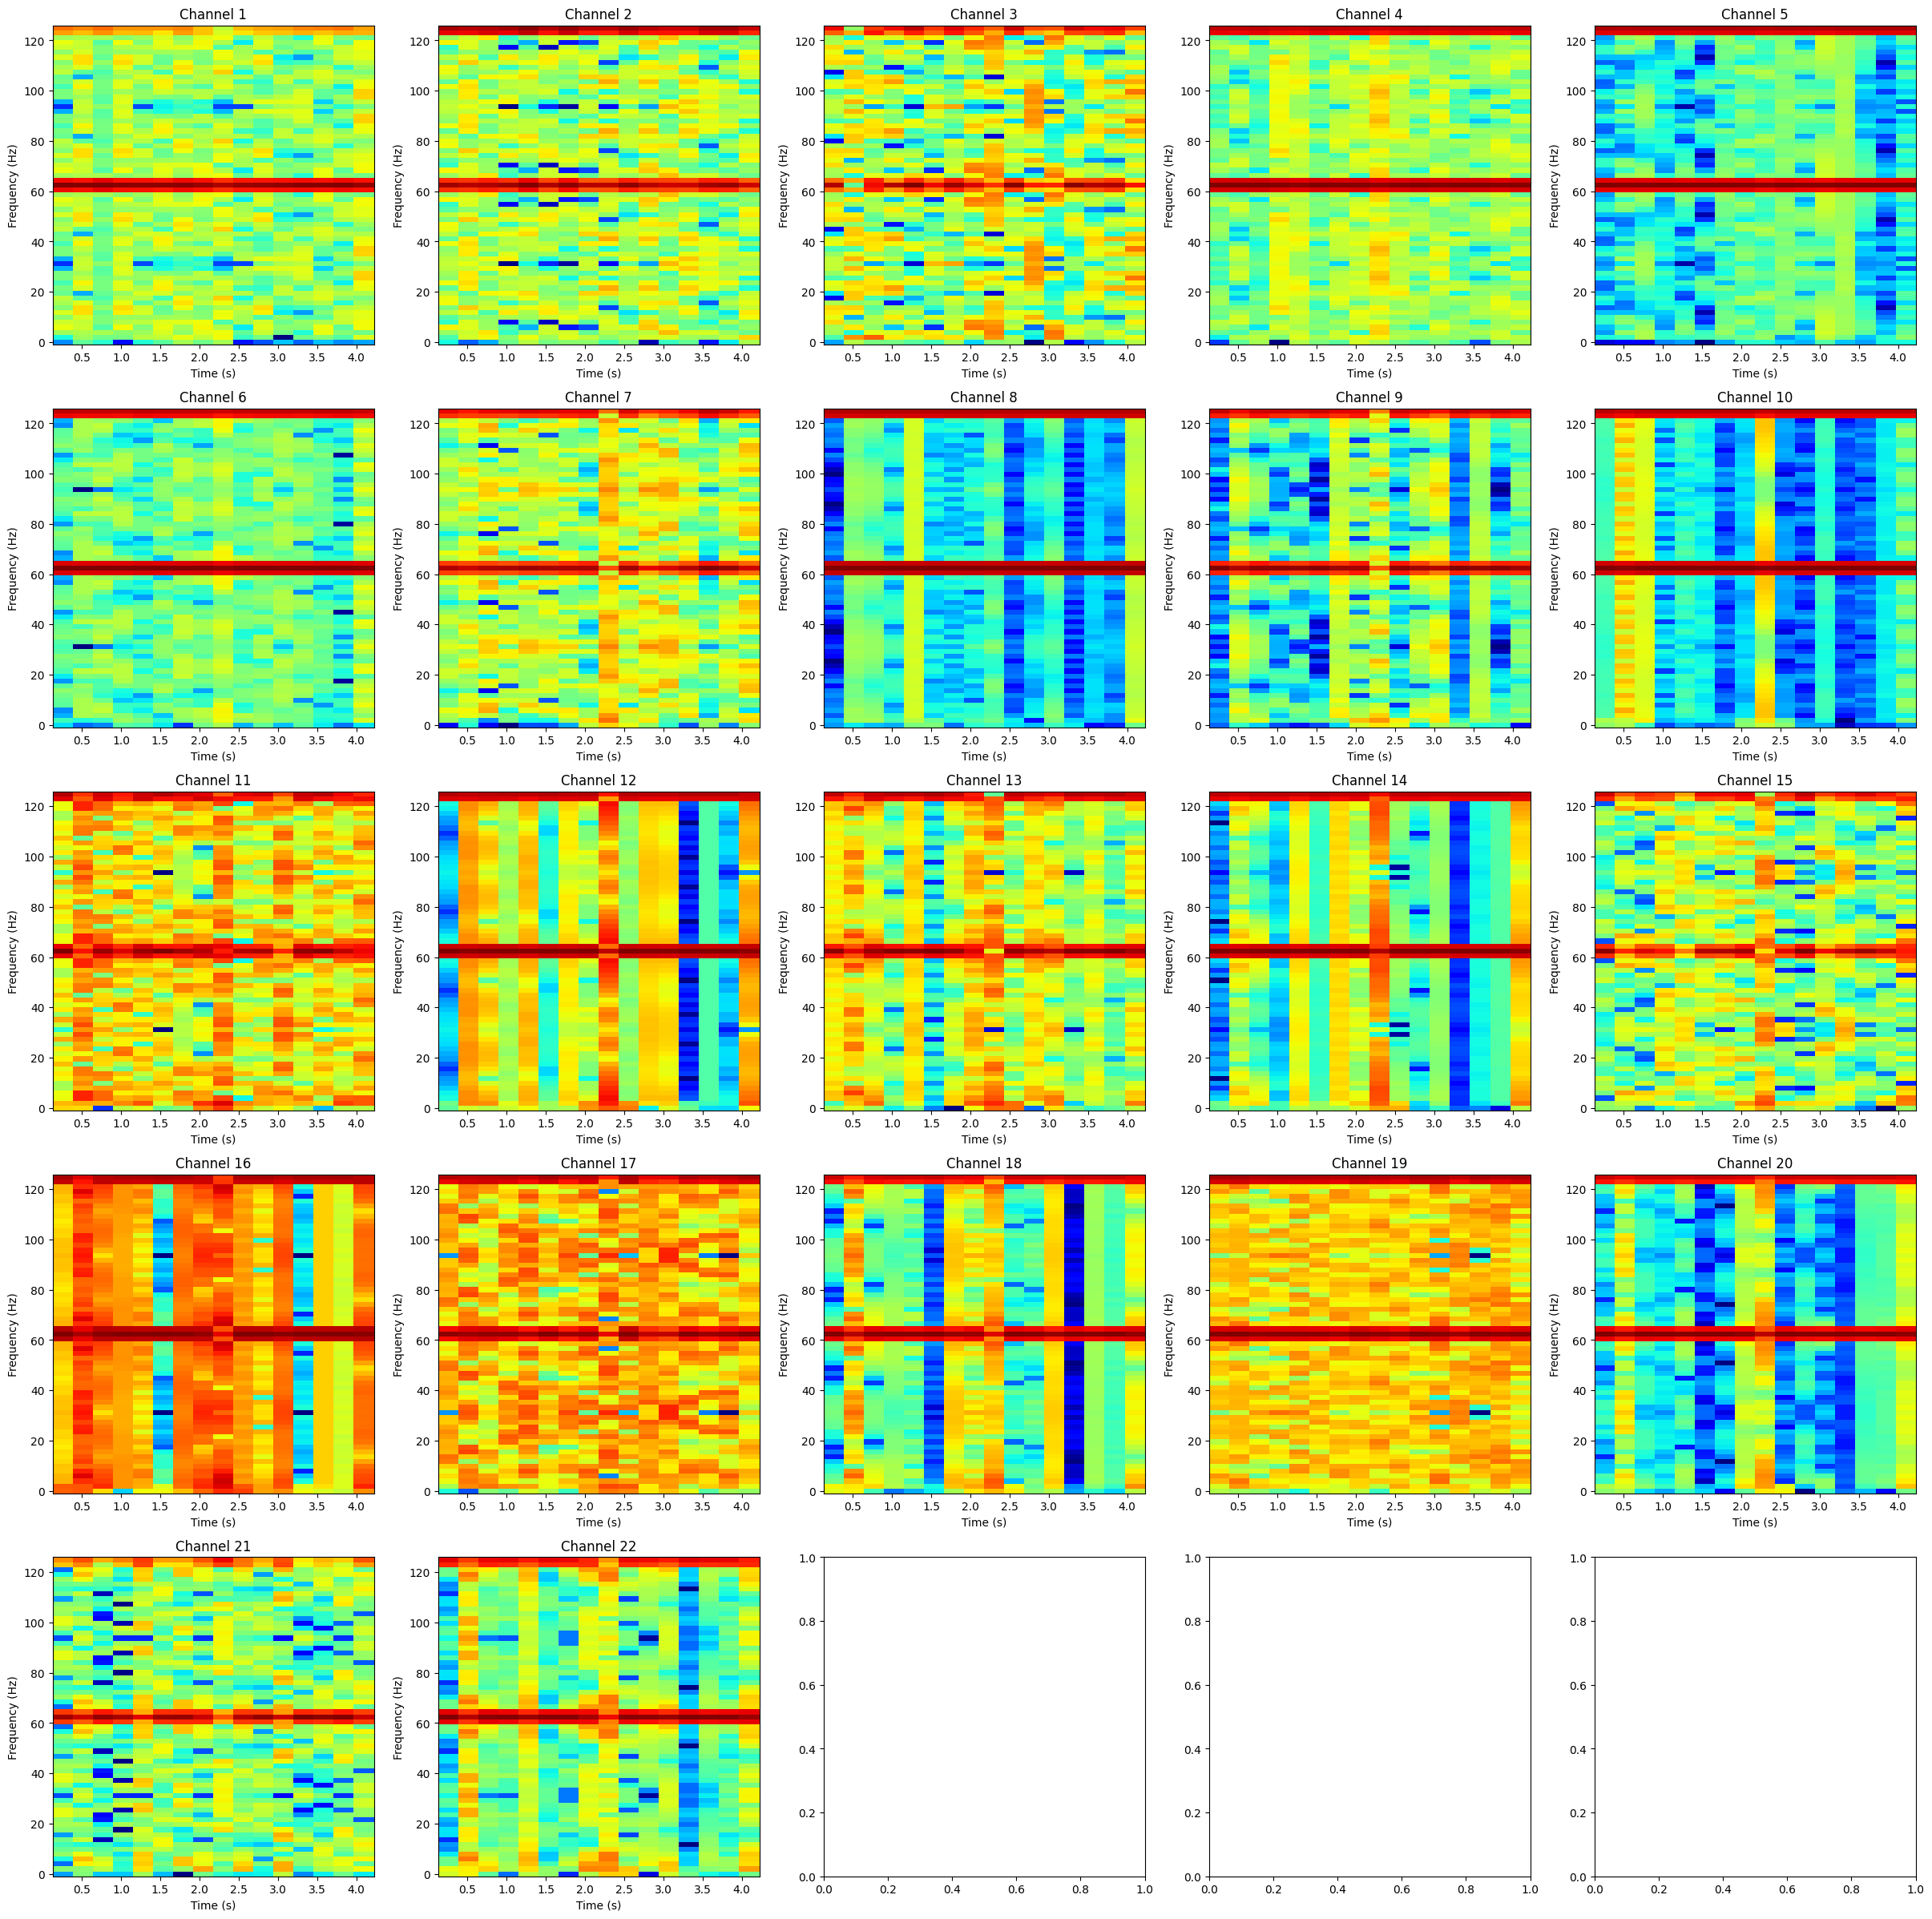

In [35]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(30, 30))
for i in range(5):
    for j in range(5):
        axs[i,j].pcolormesh(t, f, 20*np.log10(abs(spectrograms_spectrogram[0][i*5+j, :, :])), cmap='jet')
        axs[i,j].set_title('Channel ' + str(i*5+j+1))
        axs[i,j].set_xlabel('Time (s)')
        axs[i,j].set_ylabel('Frequency (Hz)')
        if(i*5+j == 21):
            break
    if(i*5+j == 21):
        break

print(spectrograms_spectrogram.shape)
plt.show()

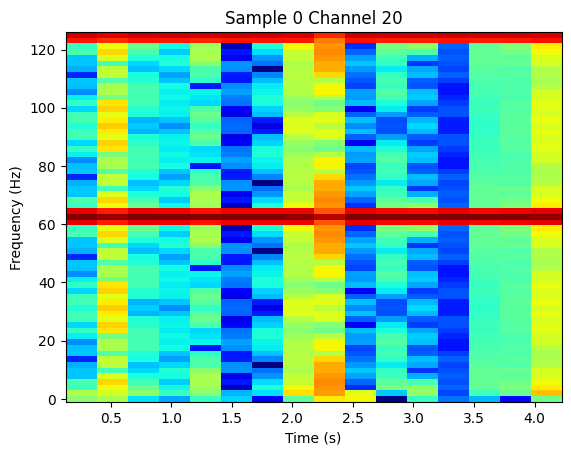

In [36]:
plt.pcolormesh(t, f, 20*np.log10(abs(spectrograms_spectrogram[0][19, :, :])), cmap='jet')
plt.title('Sample 0 Channel 20')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

In [37]:
fake_set = TensorDataset(fake, y_fake)

In [38]:
from torch.utils.data import random_split

fake_fulltrainset, fake_evalset = random_split(fake_set, [288, 288])
fake_trainset, fake_testset = random_split(fake_fulltrainset, [192, 96])
real_fulltrainset, real_evalset = random_split(real_set, [288, 288])
real_trainset, real_testset = random_split(real_fulltrainset, [192, 96])

## Definição do modelo do classificador

In [39]:
from braindecode.util import set_random_seeds
from braindecode.models import EEGNetv4

cuda = torch.cuda.is_available()
device = 'cuda' if cuda else 'cpu'
if cuda:
    torch.backends.cudnn.benchmark = False

seed = 20200220
set_random_seeds(seed=seed, cuda=cuda)

n_classes = 4
n_chans = 22
input_window_samples = 1125
F1, D = 4, 2
kernel_length = 64

model = EEGNetv4(
    n_chans,
    n_classes,
    input_window_samples=input_window_samples,
    final_conv_length='auto',
    F1=8,
    D=2,
    F2=F1*D,
    kernel_length=kernel_length,
    drop_prob=0.5
)
model.to(device);

## Treinamento do classificador com dados reais

In [40]:
from skorch.helper import predefined_split
from skorch.callbacks import LRScheduler
from braindecode import EEGClassifier

batch_size = 32
n_epochs = 50

real_clf = EEGClassifier(
    model,
    criterion=torch.nn.NLLLoss,
    optimizer=torch.optim.Adam,
    train_split=predefined_split(real_testset),
    batch_size=batch_size,
    callbacks=[
        "accuracy", ("lr_scheduler", LRScheduler('CosineAnnealingLR', T_max=n_epochs - 1)),
    ],
    device=device,
)
real_clf.fit(real_trainset, y=None, epochs=n_epochs);

  epoch    train_accuracy    train_loss    valid_accuracy    valid_loss      lr     dur
-------  ----------------  ------------  ----------------  ------------  ------  ------
      1            0.4062        1.4217            0.3958        1.3294  0.0100  0.0802
      2            0.3698        1.3464            0.3542        1.3331  0.0100  0.0778
      3            0.3073        1.1640            0.2812        1.7989  0.0100  0.0734
      4            0.3073        1.0157            0.2917        2.4037  0.0099  0.0714
      5            0.3229        0.8826            0.2812        2.7791  0.0098  0.0707
      6            0.3385        0.8306            0.2604        2.8497  0.0097  0.0704
      7            0.4219        0.7651            0.3229        2.2632  0.0096  0.0708
      8            0.5625        0.7611            0.3854        1.7789  0.0095  0.0709
      9            0.6406        0.6921            0.4062        1.6793  0.0094  0.0714
     10            0.6979       

In [41]:
print(f"Mean Accuracy: {np.mean(real_clf.predict(real_evalset) == [y for X,y in real_evalset])*100:.2f}%")

Mean Accuracy: 70.83%


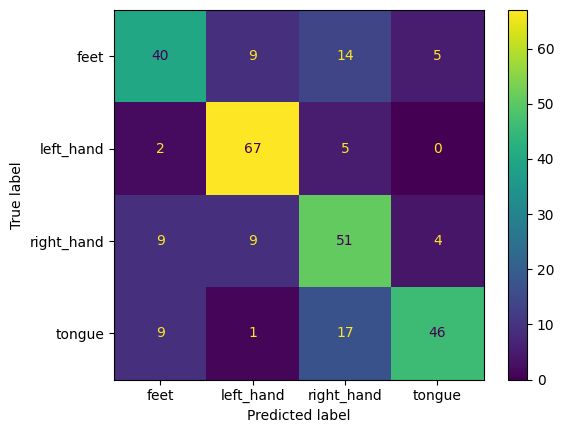

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

trtr = real_clf.predict(real_evalset)

conf_matrix = confusion_matrix(
    y_true=[y for _,y in real_evalset],
    y_pred=trtr,
    labels=list([0, 1, 2, 3]),
)

disp = ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix, 
    display_labels=list(["feet", "left_hand", "right_hand", "tongue"])
)
disp.plot()
plt.show();

In [43]:
print(f"Mean Accuracy: {np.mean(real_clf.predict(fake_evalset) == [y for X,y in fake_evalset])*100:.2f}%")

Mean Accuracy: 23.26%


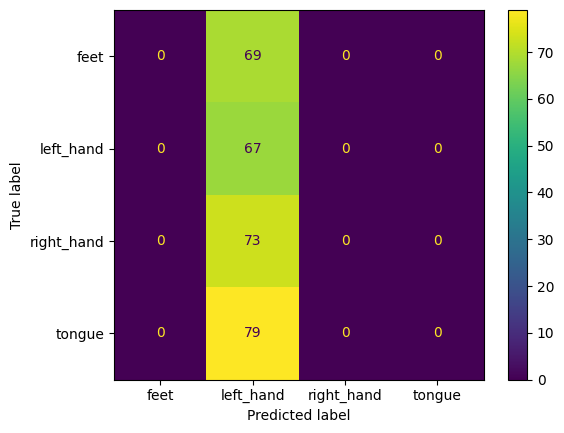

In [44]:
trts = real_clf.predict(fake_evalset)

conf_matrix = confusion_matrix(
    y_true=[y for _,y in fake_evalset],
    y_pred=trts,
    labels=list([0, 1, 2, 3]),
)

disp = ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix, 
    display_labels=list(["feet", "left_hand", "right_hand", "tongue"])
)
disp.plot()
plt.show();

## Treinamento do classificador com dados sintéticos

In [45]:
fake_clf = EEGClassifier(
    model,
    criterion=torch.nn.NLLLoss,
    optimizer=torch.optim.Adam,
    train_split=predefined_split(fake_testset),
    batch_size=batch_size,
    callbacks=[
        "accuracy", ("lr_scheduler", LRScheduler('CosineAnnealingLR', T_max=n_epochs - 1)),
    ],
    device=device,
)
fake_clf.fit(fake_trainset, y=None, epochs=n_epochs);

  epoch    train_accuracy    train_loss    valid_accuracy    valid_loss      lr     dur
-------  ----------------  ------------  ----------------  ------------  ------  ------
      1            0.2760        0.6654            0.2500        7.0289  0.0100  0.0712
      2            0.2760        0.0071            0.2500        6.8922  0.0100  0.0706
      3            0.2760        0.0100            0.2500        6.9150  0.0100  0.0726
      4            0.2760        0.0021            0.2500        6.8911  0.0099  0.0713
      5            0.2760        0.0099            0.2500        6.7946  0.0098  0.0711
      6            0.2760        0.0174            0.2500        7.1908  0.0097  0.0706
      7            0.2760        0.0013            0.2500        7.4274  0.0096  0.0707
      8            0.2760        0.0024            0.2500        7.2690  0.0095  0.0711
      9            0.2760        0.0006            0.2500        6.9436  0.0094  0.0703
     10            0.2760       

In [46]:
print(f"Mean Accuracy: {np.mean(fake_clf.predict(real_evalset) == [y for X,y in real_evalset])*100:.2f}%")

Mean Accuracy: 31.60%


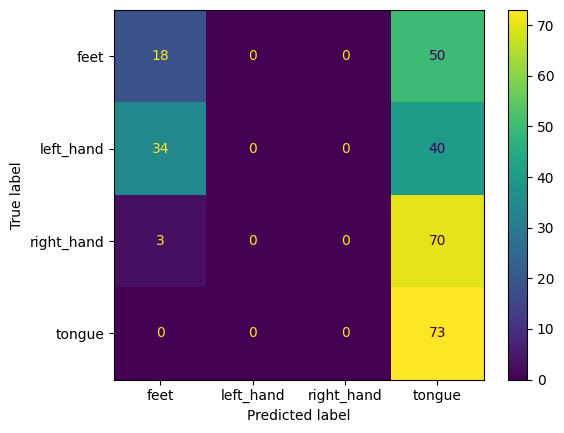

In [47]:
tstr = real_clf.predict(real_evalset)

conf_matrix = confusion_matrix(
    y_true=[y for _,y in real_evalset],
    y_pred=tstr,
    labels=list([0, 1, 2, 3]),
)

disp = ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix, 
    display_labels=list(["feet", "left_hand", "right_hand", "tongue"])
)
disp.plot()
plt.show();

In [48]:
print(f"Mean Accuracy: {np.mean(fake_clf.predict(fake_evalset) == [y for X,y in fake_evalset])*100:.2f}%")

Mean Accuracy: 68.40%


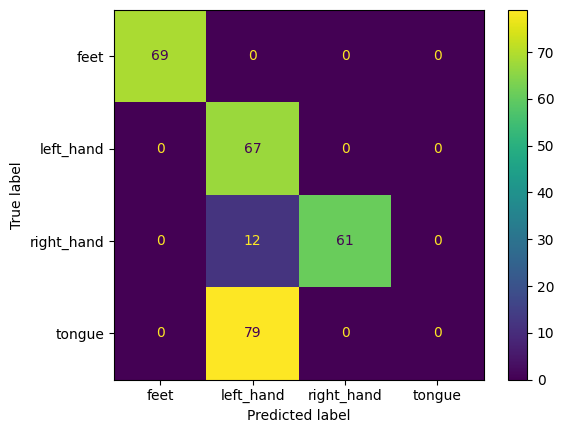

In [49]:
tsts = real_clf.predict(fake_evalset)

conf_matrix = confusion_matrix(
    y_true=[y for _,y in fake_evalset],
    y_pred=tsts,
    labels=list([0, 1, 2, 3]),
)

disp = ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix, 
    display_labels=list(["feet", "left_hand", "right_hand", "tongue"])
)
disp.plot()
plt.show();

## Distância euclidiana entre os dados reais e sintéticos

In [50]:
real = X_.view(-1, *size)

In [51]:
torch.norm(real-fake, 2)

tensor(24479.8828)

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
